In [12]:
import numpy as np 
import matplotlib 
import math 
import matplotlib.pyplot as plt
from scipy.spatial import distance
import random
import matplotlib.animation as animation
import copy
%matplotlib inline
from time import *
import cmath

In [2]:
A=5
B=10
d_min=0.8
d_max=2.2
imax=20
shift_d = 0.0002

In [3]:
def potential(q,p): #定义原子间的势能，A，B为参数
   return A/(distance.euclidean(q,p)**12) - B/(distance.euclidean(p,q)**6)


In [4]:
class Atom:
    def __init__(self,coords):
        self.coords = coords
        self.force = [0, 0]

In [7]:
class seed():
    
    def __init__(self, size):
        self.size = size
        self.atoms = []
        self.converge_x = np.zeros(size+1)
        self.converge_y = np.zeros(size+1)
        return
    
    def generate_atoms(self):
        #产生距离合适，个数为‘size’的原子集合，Atom是一个类，里面包含原子的坐标（coords）和受力（force）
        
        self.atoms = []  #self.atoms是一个列表，每个列表元素为一个Atom类的实例
        site0 = Atom([0,0]) 
        self.atoms.append(site0)
        while True:
            site = [random.uniform(-5,5),random.uniform(-5,5)] #随机产生原子坐标
            flag = 0 #设置计数器
            for atom in self.atoms: #判断新产生原子是否与已存在所有原子距离都大于d_min
                if (distance.euclidean(site,atom.coords) > d_min):
                    flag  += 1
            if (flag == len(self.atoms)): #若新产生原子与已存在所有原子距离都大于d_min
                for atom in self.atoms: #判断是否有已存在的原子与新产生原子距离小于d_max
                    if (distance.euclidean(site,atom.coords) < d_max): #若有，则保存这个新产生的原子
                        atom = Atom(site)
                        self.atoms.append(atom)                
                        break
            if len(self.atoms) > self.size : #若原子数量等于‘size’，则返回
                break
    
    def Print(self):
        for atom in self.atoms:
            print(atom.force)
            
    
    def cal_V(self):
        #计算原子间的总势能        
        V_sum = 0
        for atom in self.atoms: #对每个原子进行循环
            for atom1 in self.atoms: #计算每个原子的总势能，再相加
                if atom1.coords != atom.coords:
                    V_sum = potential(atom.coords,atom1.coords) + V_sum
        V_sum = V_sum/2
        return V_sum
    
    def cal_force(self): 
        for atom0 in self.atoms: #对每个原子循环
            fx, fy = 0, 0
            for atom1 in self.atoms: #计算某个原子的受力 
                if atom1.coords != atom0.coords:
                    d = distance.euclidean(atom0.coords, atom1.coords) #d是两原子间的距离
                    f = 12*A/(d**13) - 6*B/(d**7) #原子间力的大小由势能求导得到
                    x = atom0.coords[0] - atom1.coords[0]   #分别计算x和y方向的受力，储存在force中
                    y = atom0.coords[1] - atom1.coords[1]
                    fx = f*(x/d) + fx
                    fy = f*(y/d) + fy
            atom0.force[0] = fx
            atom0.force[1] = fy
        
            
            
    def rebuild1(self, shift_d):
        
        
        #shift those atoms to find lower potential , the distance that each atom moves depends on its force plus a tiny coefficient         
        for atom in self.atoms: 
            if d(atom.force[0], atom.force[1]) > 1000:
                atom.coords[0] = shift_d*atom.force[0]/d(atom.force[0], atom.force[1])*100 + atom.coords[0]
                atom.coords[1] = shift_d*atom.force[1]/d(atom.force[0], atom.force[1])*100 + atom.coords[1]
            elif d(atom.force[0], atom.force[1]) < 0.01: 
                atom.coords[0] = shift_d*atom.force[0] + atom.coords[0]
                atom.coords[1] = shift_d*atom.force[1] + atom.coords[1]
            else:
                atom.coords[0] = shift_d*atom.force[0]/d(atom.force[0], atom.force[1]) + atom.coords[0]
                atom.coords[1] = shift_d*atom.force[1]/d(atom.force[0], atom.force[1]) + atom.coords[1]
        return
    
    def picture(self):
        fig = plt.figure()
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
        ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-5, 5), ylim=(-5, 5))
        for atom3 in self.atoms:
            ax.scatter(atom3.coords[0],atom3.coords[1], color = 'black')

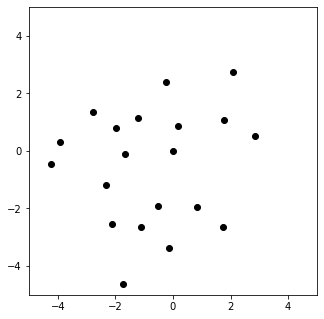

In [13]:
a = [seed(19), seed(19), seed(19), seed(19), seed(19)]
a[1].generate_atoms()
a[1].picture()

In [14]:
begin_time = time()
for i in range(len(a)):
    a[i] = copy.deepcopy(a[1])
x = [[] for i in range(5)]
y = [[] for i in range(5)]
shift = [0.001, 0.0012, 0.0014, 0.0016, 0.0018]
for i in range(5):
    j = 0
    while True :
        V_sum = a[i].cal_V()
        a[i].cal_force()
        a[i].rebuild1(shift[i])
        V_previous = V_sum
        V_sum = a[i].cal_V()
        x[i].append(j)
        j = j + 1
        y[i].append(V_sum)
        if (V_previous - V_sum) < 0.001 or (V_previous < V_sum):
            break
print(y)
end_time = time()
run_time = end_time-begin_time
print ('该循环程序运行时间：',run_time)

[[-5.780692695468564, -8.298798337454464, -10.723884618138841, -13.059358659370416, -15.308506747179097, -17.47449878018838, -19.560392535480393, -21.5691377721805, -23.503580184257334, -25.366465204147058, -27.160441649761434, -28.888065200984514, -30.551801689172816, -32.15403018500097, -33.69704587600277, -35.18306273434469, -36.614215985967554, -37.99256440204207, -39.32009244054648, -40.598712268265245, -41.83026569154186, -43.016526019144834, -44.159199875092234, -45.259928975747485, -46.3202918853492, -47.34180576695465, -48.32592814943455, -49.2740587327682, -50.18754125116976, -51.06766540593066, -51.915668868682666, -52.7327393438019, -53.520016668752405, -54.27859492529676, -55.00952453325386, -55.71381430118989, -56.3924334137429, -57.04631334171743, -57.67634966743603, -58.28340382335685, -58.868304746283556, -59.43185045259081, -59.974809541874855, -60.49792263752485, -61.00190377311041, -61.48744173334194, -61.955201357837296, -62.405824815064214, -62.8399328526802, -63.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


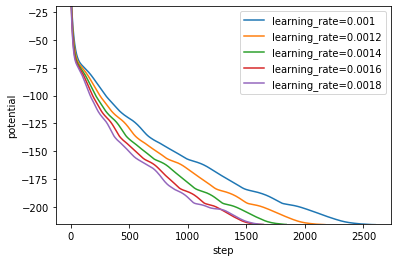

In [15]:
plt.xlabel('step')
plt.ylabel('potential')
plt.ylim(-215,-20)

k = [0, 0, 0, 0, 0]
for i in range(5):
    k[i], = plt.plot(x[i], y[i]) 
plt.legend([k[i]], labels = ['learning_rate=0.001', 'learning_rate=0.0012', 'learning_rate=0.0014' ,'learning_rate=0.0016', 'learning_rate=0.0018'])

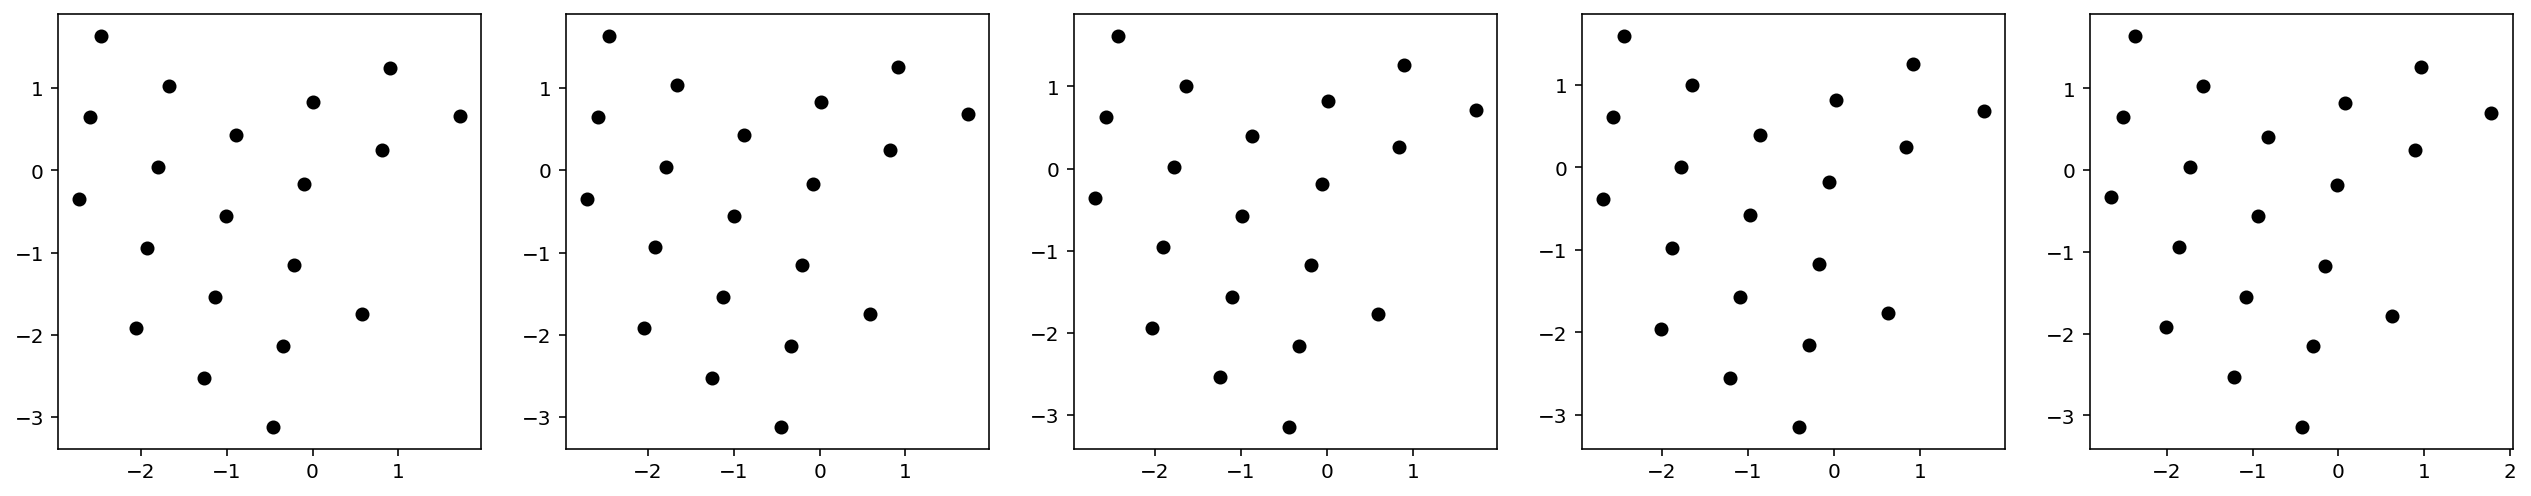

In [16]:
plt.figure(figsize=(22, 4), dpi=144)
for i in range(5):
    plt.subplot(1,5,i+1 , label = 'i')
    for atom3 in a[i].atoms:
        plt.scatter(atom3.coords[0],atom3.coords[1], color = 'black',label='i')